In [1]:
import pypowsybl as pp

Load CGMES micro grids BE and NL

In [2]:
be = pp.network.load('data/MicroGridTestConfiguration_T4_BE_BB_Complete_v2.zip')
nl = pp.network.load('data/MicroGridTestConfiguration_T4_NL_BB_Complete_v2.zip')

Merge the NL into BE

In [3]:
be.merge(nl)
eu = be

Get all substations as a Pandas data frame

In [4]:
eu.get_substations()

,name,TSO,geo_tags,country
id,,,,
_87f7002b-056f-4a6a-a872-1744eea757e3,Anvers,,ELIA-Anvers,BE
_37e14a0f-5e34-4647-a062-8bfd9305fa9d,PP_Brussels,,ELIA-Brussels,BE
_c49942d6-8b01-4b01-b5e8-f1180f84906c,PP_Amsterdam,,TENNET TSO B.V.,NL


Display the merged network

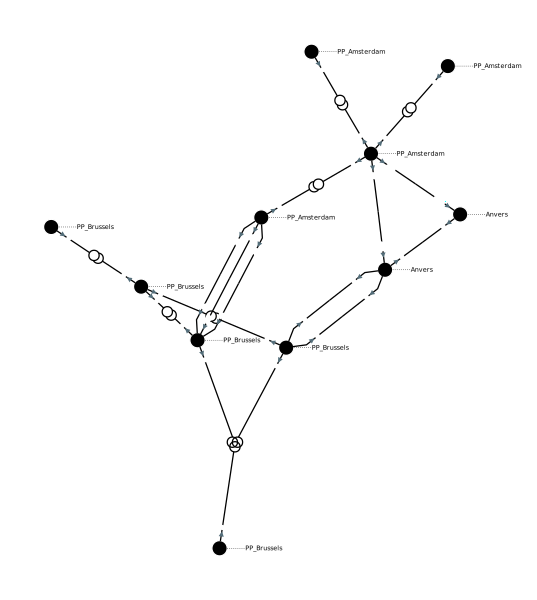

In [5]:
eu.get_network_area_diagram()

Run an AC load flow

In [6]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=6, slack_bus_id='_8d8a82ba-b5b0-4e94-861a-192af055f2b8_0', slack_bus_active_power_mismatch=-0.6335419944732301)]

Get active power setpoint of generator _3a3b27be-b18b-4385-b557-6735d733baf0

In [7]:
generators = eu.get_generators()
generators['target_p']['_3a3b27be-b18b-4385-b557-6735d733baf0']

90.0

Update active power setpoint to 100 MW

In [8]:
eu.update_generators(id='_3a3b27be-b18b-4385-b557-6735d733baf0', target_p=100)

Check active power setpoint has been updated

In [9]:
generators = eu.get_generators()
generators['target_p']['_3a3b27be-b18b-4385-b557-6735d733baf0']

100.0

Re-run AC load flow with new setpoint

In [10]:
results = pp.loadflow.run_ac(eu)
results

[ComponentResult(connected_component_num=0, synchronous_component_num=0, status=CONVERGED, iteration_count=7, slack_bus_id='_8d8a82ba-b5b0-4e94-861a-192af055f2b8_0', slack_bus_active_power_mismatch=-0.6186876651809392)]

Get generators data frame

In [11]:
eu.get_generators()

,name,energy_source,target_p,min_p,max_p,min_q,max_q,reactive_limits_kind,target_v,target_q,voltage_regulator_on,regulated_element_id,p,q,i,voltage_level_id,bus_id,connected
id,,,,,,,,,,,,,,,,,,
_3a3b27be-b18b-4385-b557-6735d733baf0,BE-G1,OTHER,100.000000,50.0,200.0,NaN,NaN,CURVE,115.50000,100.256000,True,,-94.315595,69.265339,6503.036248,_4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386,_4ba71b59-ee2f-450b-9f7d-cc2f1cc5e386_0,True
_550ebe0d-f2b2-48c1-991f-cebea43a21aa,BE-G2,OTHER,118.000000,50.0,200.0,-200.0,200.0,MIN_MAX,21.98700,18.720301,True,,-112.315595,-81.109194,3637.897164,_929ba893-c9dc-44d7-b1fd-30834bd3ab85,_929ba893-c9dc-44d7-b1fd-30834bd3ab85_0,True
_2844585c-0d35-488d-a449-685bcd57afbf,NL-G2,OTHER,140.000000,130.0,250.0,0.0,200.0,MIN_MAX,16.01775,77.743000,True,,-132.894493,-11.997501,4809.583459,_2a37dc57-2faf-464a-8175-bc415f9a635f,_2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
_1dc9afba-23b5-41a0-8540-b479ed8baf4b,NL-G3,OTHER,150.000000,130.0,250.0,0.0,200.0,MIN_MAX,16.01775,83.296000,True,,-142.894493,-11.997501,5168.669189,_2a37dc57-2faf-464a-8175-bc415f9a635f,_2a37dc57-2faf-464a-8175-bc415f9a635f_0,True
_9c3b8f97-7972-477d-9dc8-87365cc0ad0e,NL-G1,OTHER,600.492701,300.0,1000.0,0.0,600.0,MIN_MAX,16.03350,386.922556,True,,-572.070675,-219.404561,22062.769723,_8d8a82ba-b5b0-4e94-861a-192af055f2b8,_8d8a82ba-b5b0-4e94-861a-192af055f2b8_0,True


Get lines data frame

In [12]:
eu.get_lines()

,name,r,x,g1,b1,g2,b2,p1,q1,i1,p2,q2,i2,voltage_level1_id,voltage_level2_id,bus1_id,bus2_id,connected1,connected2
id,,,,,,,,,,,,,,,,,,,
_b58bf21a-096a-4dae-9a01-3f03b60c24c7,BE-Line_2,1.935,34.200000,0.000034,0.000021,0.000034,0.000021,-112.778659,15.009001,292.995501,116.674136,-8.040672,302.216960,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,_d0486169-2205-40b2-895e-b672ecb9e5fc,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,_d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True
_ffbabc27-1ccd-4fdc-b037-e341706c8d29,BE-Line_6,5.203,71.000000,0.000060,0.000010,0.000060,0.000010,-51.930010,8.146842,135.369178,58.260986,-4.778814,151.059926,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,_d0486169-2205-40b2-895e-b672ecb9e5fc,_b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,_d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,True
_df16b3dd-c905-4a6f-84ee-f067be86f5da,SER-RLC-1230822986,0.000,-31.830989,0.000000,0.000000,0.000000,0.000000,-96.832675,17.286390,254.184769,96.832675,-23.456181,254.184769,_d0486169-2205-40b2-895e-b672ecb9e5fc,_69ef0dbd-da79-4eef-a02f-690cb8a28361,_d0486169-2205-40b2-895e-b672ecb9e5fc_0,_69ef0dbd-da79-4eef-a02f-690cb8a28361_0,True,True
_78736387-5f60-4832-b3fe-d50daf81b0a6 + _7f43f508-2496-4b64-9146-0a40406cbe49,BE-Line_3 + NL-Line_1,2.070,24.000000,0.000060,0.000150,0.000030,0.000141,-3.422042,40.189883,56.140346,18.869934,-89.229464,128.097094,_469df5f7-058f-4451-a998-57a48e8a56fe,_c1d5bfde8f8011e08e4d00247eb1f55e,_469df5f7-058f-4451-a998-57a48e8a56fe_0,_c1d5bfde8f8011e08e4d00247eb1f55e_0,True,True
_b18cd1aa-7808-49b9-a7cf-605eaf07b006 + _e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc,BE-Line_5 + NL-Line_5,0.840,12.600000,0.000042,0.000066,0.000035,0.000065,-21.440323,113.967471,161.407215,34.661906,-135.071103,195.858216,_469df5f7-058f-4451-a998-57a48e8a56fe,_c1d5bfde8f8011e08e4d00247eb1f55e,_469df5f7-058f-4451-a998-57a48e8a56fe_0,_c1d5bfde8f8011e08e4d00247eb1f55e_0,True,True
_dad02278-bd25-476f-8f58-dbe44be72586 + _ed0c5d75-4a54-43c8-b782-b20d7431630b,BE-Line_4 + NL-Line_2,2.560,22.240000,0.000040,0.000025,0.000040,0.000025,-5.874886,67.049677,93.680051,19.594755,-74.952098,108.810369,_469df5f7-058f-4451-a998-57a48e8a56fe,_c1d5bfde8f8011e08e4d00247eb1f55e,_469df5f7-058f-4451-a998-57a48e8a56fe_0,_c1d5bfde8f8011e08e4d00247eb1f55e_0,True,True
_a16b4a6c-70b1-4abf-9a9d-bd0fa47f9fe4 + _a279a3dc-550b-426c-af3a-61b7be508dcc,BE-Line_7 + NL-Line_3,9.660,138.000000,0.000057,0.000022,0.000023,0.000020,-96.832923,23.456178,254.185383,102.926444,2.868244,265.045955,_69ef0dbd-da79-4eef-a02f-690cb8a28361,_c1d5bfea8f8011e08e4d00247eb1f55e,_69ef0dbd-da79-4eef-a02f-690cb8a28361_0,_c1d5bfea8f8011e08e4d00247eb1f55e_0,True,True
_17086487-56ba-4979-b8de-064025a6b4da + _8fdc7abd-3746-481a-a65e-3df56acd8b13,BE-Line_1 + NL-Line_4,4.400,134.200000,0.000031,0.000083,0.000024,0.000090,-79.102185,5.938366,204.986006,82.439201,3.157070,212.362412,_d0486169-2205-40b2-895e-b672ecb9e5fc,_c1d5bfea8f8011e08e4d00247eb1f55e,_d0486169-2205-40b2-895e-b672ecb9e5fc_0,_c1d5bfea8f8011e08e4d00247eb1f55e_0,True,True


Run sensitivity analysis:
 - node (generator _3a3b27be-b18b-4385-b557-6735d733baf0) to slack
 - zone (BE) to slack
 - zone (BE) to zone (NL) => PTDF

'_b18cd1aa-7808-49b9-a7cf-605eaf07b006 + _e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc' is a BE/NL tieline

In [13]:
sa = pp.sensitivity.create_dc_analysis()
country_be = pp.sensitivity.create_country_zone(eu, 'BE')
country_nl = pp.sensitivity.create_country_zone(eu, 'NL')
sa.set_zones([country_be, country_nl])
sa.set_branch_flow_factor_matrix(branches_ids=['_b18cd1aa-7808-49b9-a7cf-605eaf07b006 + _e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc'], variables_ids=['_3a3b27be-b18b-4385-b557-6735d733baf0', 'BE', ('BE', 'NL')])
results = sa.run(eu)
results.get_branch_flows_sensitivity_matrix()

,_b18cd1aa-7808-49b9-a7cf-605eaf07b006 + _e8acf6b6-99cb-45ad-b8dc-16c7866a4ddc
_3a3b27be-b18b-4385-b557-6735d733baf0,0.336544
BE,0.333526
BE -> NL,0.422527
